In [1]:
from matplotlib import pyplot as plt
import seaborn as sns 
import pandas as pd
import numpy as np 
import pathlib 

In [19]:
with open("calibration_results/metrics.csv") as f:
    metric_df = pd.read_csv(f)


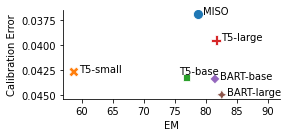

In [30]:
cf_metric_df = metric_df[metric_df['Dataset'] == "CalflowV2"]
fig, ax = plt.subplots(figsize=(4.0, 2.0))
sns.scatterplot(data = cf_metric_df, x = "EM", y = "Calibration Error", hue = "Model", style = "Model", s = 100)
ax.invert_yaxis()
ax.set_xlim(57, 92)
sns.despine()
for i, row in cf_metric_df.iterrows():
    if row['Model'] in ["BART-base","BART-large", "MISO"]: 
        xy = (6, -1)
    if row['Model'] == "T5-base": 
        xy = (-8, 4)
    else:
        xy = (5, 0)
    ax.annotate(row['Model'], (row['EM'], row['Calibration Error']), xytext=xy, textcoords='offset points')
# plt.legend(frameon=False)
plt.legend().remove()


plt.tight_layout()
plt.savefig("/home/estengel/papers/did-you-mean-2022/figures/pareto.pdf")


In [3]:
metric_df.head()

,Model,Dataset,Split,EM,Calibration Error,Calibration Error (above),Calibration Error (below),Params,Model Path,Prediction Path,Logit Path,Calibration command
0,MISO,CalflowV2,test_all,78.85,0.0369,0.0035,0.0334,127M,/brtx/604-nvme1/estengel/calflow_calibration/m...,/brtx/604-nvme1/estengel/calflow_calibration/m...,/brtx/604-nvme1/estengel/calflow_calibration/m...,NaN
1,T5-small,CalflowV2,test_all,58.77,0.0427,0.0000,0.0426,60M,/brtx/603-nvme1/estengel/calflow_calibration/b...,/brtx/601-nvme1/estengel/calflow_calibration/b...,/brtx/603-nvme1/estengel/calflow_calibration/b...,NaN
2,T5-base,CalflowV2,test_all,76.96,0.0433,0.0004,0.0428,220M,/brtx/603-nvme1/estengel/calflow_calibration/b...,/brtx/601-nvme1/estengel/calflow_calibration/b...,/brtx/603-nvme1/estengel/calflow_calibration/b...,NaN
3,T5-large,CalflowV2,test_all,81.72,0.0395,0.0005,0.0390,770M,/brtx/603-nvme1/estengel/calflow_calibration/b...,running,/brtx/603-nvme1/estengel/calflow_calibration/b...,NaN
4,BART-base,CalflowV2,test_all,81.51,0.0434,0.0008,0.0425,139M,/brtx/604-nvme1/estengel/calflow_calibration/b...,/brtx/601-nvme1/estengel/calflow_calibration/b...,/brtx/604-nvme1/estengel/calflow_calibration/b...,NaN


In [6]:
metric_df_to_print = metric_df.copy()
metric_df_to_print['Calibration Error'] = metric_df_to_print['Calibration Error']*100
metric_df_to_print['Calibration Error'] = metric_df_to_print['Calibration Error'].round(2)

calflow_df = metric_df_to_print[metric_df_to_print['Dataset'] == "CalflowV2"]
tree_dst_df = metric_df_to_print[metric_df_to_print['Dataset'] == "TreeDST"]
calflow_table = calflow_df.to_latex(columns = ["Model", "EM", "Calibration Error"], index=False)
tree_dst_table = tree_dst_df.to_latex(columns = ["Model",  "EM", "Calibration Error"], index=False)
print(calflow_table)
print(tree_dst_table)


\begin{tabular}{lrr}
\toprule
      Model &     EM &  Calibration Error \\
\midrule
       MISO &  78.85 &               3.69 \\
   T5-small &  58.77 &               4.27 \\
    T5-base &  76.96 &               4.33 \\
   T5-large &  81.72 &               3.95 \\
  BART-base &  81.51 &               4.34 \\
 BART-large &  82.62 &               4.50 \\
\bottomrule
\end{tabular}

\begin{tabular}{lrr}
\toprule
                                Model &     EM &  Calibration Error \\
\midrule
 MISO+roberta tuned, tokenization fix &  91.03 &               4.74 \\
                             T5-small &  81.29 &               4.75 \\
                              T5-base &    NaN &               4.81 \\
                             T5-large &    NaN &               4.81 \\
                            BART-base &  91.32 &               4.74 \\
                           BART-large &  91.60 &               4.86 \\
\bottomrule
\end{tabular}

